# SI 370: Introduction to Machine Learning

We suggest you use extra markdown blocks or code comments to record your notes.

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Seaborn (and other packages) come bundled with datasets.  Let's load the infamous Fisher's Iris Dataset:

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exercise 1:
Create a 2-d scatterplot of petal_width (on the y-axis) vs. petal_length (on the x-axis) that includes a regression line.

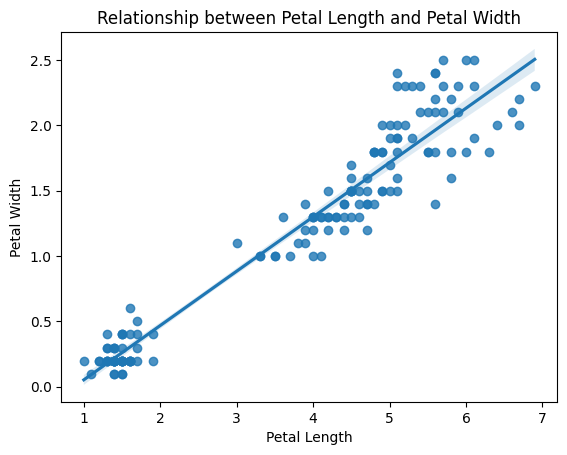

In [10]:
# Insert your code here
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.title('Relationship between Petal Length and Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### Exercise 2:
Create a regression model of petal_width as the outcome variable and petal_length as the explanatory variable.  You might find the notebook on correlation and regression to be helpful here.

In [11]:
# Insert your code here
reg_model = smf.ols(formula='Q("petal_width") ~ Q("petal_length")', data=iris).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("petal_width")   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.68e-86
Time:                        08:47:14   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3631      0.040     -9.131      0.000      -0.442      -0.285
Q("petal_length")     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Introduction to scikit-learn

Recall the general process for using a scikit-learn estimator:
1. choose appropriate class that implements what you want to do and import it
1. choose model hyperparameters (or accept default ones, but be careful) and instantiate class
1. arrange data into features and labels
1. .fit() your model to the data
1. apply model to new data with .predict() for supervised learning

Let's do that with the regression model we implemented using statsmodels above:



1. choose appropriate class that implements what you want to do and import it

This takes a bit of experience to figure out, but we'll cover the common ones over the next few classes.  For now, I'll tell you that we want to use sklearn.linear_model.LinearRegression.  Import only that class into your default namespace:

### Exercise: write the correct line to import LinearRegression from the sklearn.linear_model module:

In [12]:
# Insert your code here
from sklearn.linear_model import LinearRegression

### Exercise: choose model hyperparameters (or accept default ones, but be careful) and instantiate class
It's ok to accept the defaults this time. Let's assign the model to a variable called `lm`.

In [20]:
# Insert your code here
lm = LinearRegression()


### Exercise: arrange data into features and labels
Create one dataframe for the 'y' values (and call it 'y') and another dataframe for the 'x' values (and call it 'X').

In [31]:
# Insert your code here

X = iris[['petal_length']] # Feature; double square brackets used to keep "X" as a DataFrame (2D), 
                           # which is the expected input format for sklearn models.
                           
y = iris[['petal_width']] # Label

### Exercise: .fit() your model to the data

In [24]:
# Insert your code here
lm = lm.fit(X, y)

### Exercise: apply model to new data with .predict() 
What's the estimated value for petal_width if the petal_length is 10?

In [30]:
# Insert your code here
lm.predict(np.array([10]).reshape(-1,1))

/Users/ryansimon/Documents/University of Michigan/Senior 2023-2024/Fall 2023/SI 370/si370fa23-student-main/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.79447864]])

Notes:

.reshape(-1, 1) function changes the shape of the input array to be 2-dimensional, which is the expected input shape for the .predict() method in scikit-learn.

-1: It means that the length of that dimension is inferred. So it gets the size from the length of the array.

1: Indicates the size of the second dimension.

Basically, .reshape(-1, 1) turns [10] into [[10]], which is suitable for input into lm.predict().

Great!  But what does our model actually look like?

We can always access a measure of how good our model is by calling .score(X,y):

In [32]:
lm.score(X,y)

0.9271098389904927

Returns the R-squared value of the predictions

In the case of LinearRegression, we can access the coefficients for the equation:

In [33]:
lm.coef_

array([[0.41575542]])

returns an array of the coefficients for each feature variable. The coefficients describe the mathematical relationship between each independent variable and the dependent variable.

and the value of the intercept:

In [35]:
lm.intercept_

array([-0.36307552])

y-intercept value of regression model

Which, if we've done everything right, should match the results we got from statsmodels!

## Cross-validation

In [36]:
from sklearn.model_selection import cross_validate

In [40]:
result = cross_validate(lm, X, y) # see docstring for more details

In [38]:
result['test_score']

array([-0.11487018,  0.95263007,  0.38011675,  0.68756687, -0.45925651])

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Notes
* This is not a symmetric function.
* Unlike most other scores, R^2 score may be negative (it need not actually be the square of a quantity R).

See also https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative


What other scorers are available?

In [42]:
import sklearn
#sklearn.metrics.SCORERS.keys()